# Basic SQL interacting with large database

Radhika Mardikar


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    
connection = psycopg2.connect(
    user = "",
    password = "",
    host = "",
    port = "",
    database = "postgres"
)

cursor = connection.cursor()

# Total Sales (Dollar Amount)

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select sum(total_amount) as total_sale
from sales
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)


,total_sale
0,98739408


# Total Sales (Dollar Amount) Sorted by Store

In [3]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select s.city as store, sum(sa.total_amount) as total_sale
from stores as s
    join sales as sa
    on s.store_id = sa.store_id
group by store
order by store
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)


,store,total_sale
0,Berkeley,25041060
1,Dallas,19408260
2,Miami,17692404
3,Nashville,14573172
4,Seattle,22024512


# Total Sales (Dollar amount) by Month


In [4]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select to_char(sa.sale_date, 'Month') as month, sum(sa.total_amount) as total_sale, 
       extract(month from sa.sale_date) as month_num
from stores as s
    join sales as sa
    on s.store_id = sa.store_id
group by month, month_num
order by month_num
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,month,total_sale,month_num
0,January,7803828,1
1,February,7574280,2
2,March,8779620,3
3,April,8251284,4
4,May,7977840,5
5,June,8124108,6
6,July,7993044,7
7,August,9029808,8
8,September,7578960,9
9,October,8895108,10


# Total Sales (Dollar amount) by Store and Month



In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select to_char(sa.sale_date, 'Month') as month, s.city as store, sum(sa.total_amount) as total_sale,
       extract(month from sa.sale_date) as month_num
from stores as s
    join sales as sa
    on s.store_id = sa.store_id
group by store, month, month_num
order by store, month_num
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,month,store,total_sale,month_num
0,January,Berkeley,1988904,1
1,February,Berkeley,1930272,2
2,March,Berkeley,2224500,3
3,April,Berkeley,2092056,4
4,May,Berkeley,2019264,5
5,June,Berkeley,2065140,6
6,July,Berkeley,2034708,7
7,August,Berkeley,2286732,8
8,September,Berkeley,1922256,9
9,October,Berkeley,2248008,10


# Total Sales (Dollar amount) by Day of Week


In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select to_char(sa.sale_date, 'Day') as Day_of_Week, sum(sa.total_amount) as total_sale, 
       extract(dow from sa.sale_date) as dow
from stores as s
    join sales as sa
    on s.store_id = sa.store_id
group by dow, Day_of_Week
order by dow
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,day_of_week,total_sale,dow
0,Sunday,18589068,0
1,Monday,13167720,1
2,Tuesday,6895332,2
3,Wednesday,13952556,3
4,Thursday,13834644,4
5,Friday,12878628,5
6,Saturday,19421460,6


# Total Sales as a Dollar Amount by Store and Day of Week


In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select s.city as store, to_char(sa.sale_date, 'Day') as Day_of_Week, sum(sa.total_amount) as total_sale,
       extract(dow from sa.sale_date) as dow
from stores as s
    join sales as sa
    on s.store_id = sa.store_id
group by store, dow, Day_of_Week
order by store, dow
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,day_of_week,total_sale,dow
0,Berkeley,Sunday,4694640,0
1,Berkeley,Monday,3340116,1
2,Berkeley,Tuesday,1752036,2
3,Berkeley,Wednesday,3546144,3
4,Berkeley,Thursday,3507660,4
5,Berkeley,Friday,3273240,5
6,Berkeley,Saturday,4927224,6
7,Dallas,Sunday,3650748,0
8,Dallas,Monday,2602980,1
9,Dallas,Tuesday,1352760,2


# Total Number of Sales

In [3]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select count(sale_id) as total_number_sales
from sales
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)


,total_number_sales
0,1537617


# Total Number of Sales by Store


In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select s.city as store, count(sa.sale_id) as total_number_sales
from stores as s
    join sales as sa
    on s.store_id = sa.store_id
group by store
order by store
"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,store,total_number_sales
0,Berkeley,390375
1,Dallas,302120
2,Miami,275074
3,Nashville,227721
4,Seattle,342327


# Average Dollar Amount per Sale 

In [30]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select avg(total_amount) as average 
from sales
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)


,average
0,64.215866


# Average Dollar Amount per Sale by Store


In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select  s.city as store, avg(sa.total_amount) as average
from stores as s
    join sales as sa
    on s.store_id = sa.store_id
group by store
order by store
"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)


,store,average
0,Berkeley,64.146167
1,Dallas,64.240236
2,Miami,64.318707
3,Nashville,63.995732
4,Seattle,64.337642


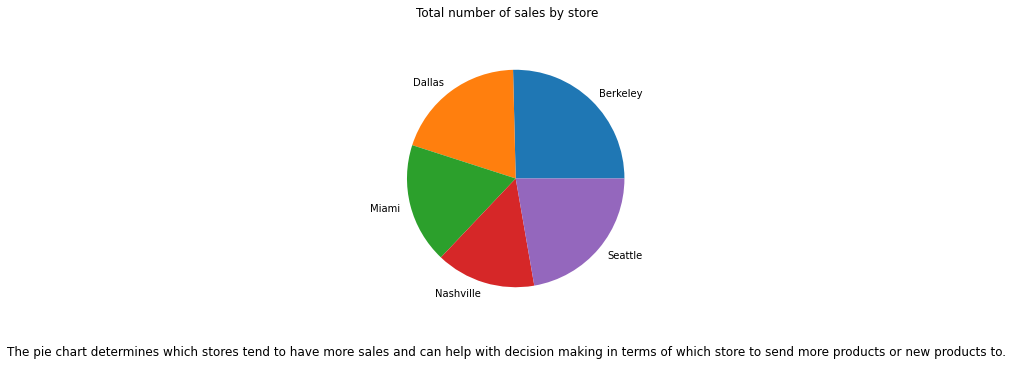

In [13]:
plt.figure(figsize = [10,5])
plt.pie(df['total_number_sales'], labels = df['store'])
plt.suptitle('Total number of sales by store')
Txt = 'The pie chart determines which stores tend to have more sales and can help with decision making in terms of which store to send more products or new products to.'
plt.figtext(0.5, 0.01, Txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()